## Assignment: $k$ Means Clustering

### `! git clone https://www.github.com/ds4e/clustering`

### **Do Q1 and one other question.**

**Q1.** This is a question about clustering. We want to investigate how adjusting the "noisiness" of the data impacts the quality of the algorithm and the difficulty of picking $k$.

1. Run the code below, which creates four datasets: `df0_125`, `df0_25`, `df0_5`, `df1_0`, and `df2_0`. Each data set is created by increasing the amount of `noise` (standard deviation) around the cluster centers, from `0.125` to `0.25` to `0.5` to `1.0` to `2.0`.

```
import numpy as np
import pandas as pd

def createData(noise,N=50):
    np.random.seed(100) # Set the seed for replicability
    # Generate (x1,x2,g) triples:
    X1 = np.array([np.random.normal(1,noise,N),np.random.normal(1,noise,N)])
    X2 = np.array([np.random.normal(3,noise,N),np.random.normal(2,noise,N)])
    X3 = np.array([np.random.normal(5,noise,N),np.random.normal(3,noise,N)])
    # Concatenate into one data frame
    gdf1 = pd.DataFrame({'x1':X1[0,:],'x2':X1[1,:],'group':'a'})
    gdf2 = pd.DataFrame({'x1':X2[0,:],'x2':X2[1,:],'group':'b'})
    gdf3 = pd.DataFrame({'x1':X3[0,:],'x2':X3[1,:],'group':'c'})
    df = pd.concat([gdf1,gdf2,gdf3],axis=0)
    return df

df0_125 = createData(0.125)
df0_25 = createData(0.25)
df0_5 = createData(0.5)
df1_0 = createData(1.0)
df2_0 = createData(2.0)
```

2. Make scatterplots of the $(X1,X2)$ points by group for each of the datasets. As the `noise` goes up from 0.125 to 2.0, what happens to the visual distinctness of the clusters?
3. Create a scree plot for each of the datasets. Describe how the level of `noise` affects the scree plot (particularly the presence of a clear "elbow") and your ability to definitively select a $k$. (Pay attention to the vertical axis across plots, or put all the scree curves on a single canvas.)
4. Explain the intuition of the elbow, using this numerical simulation as an example.

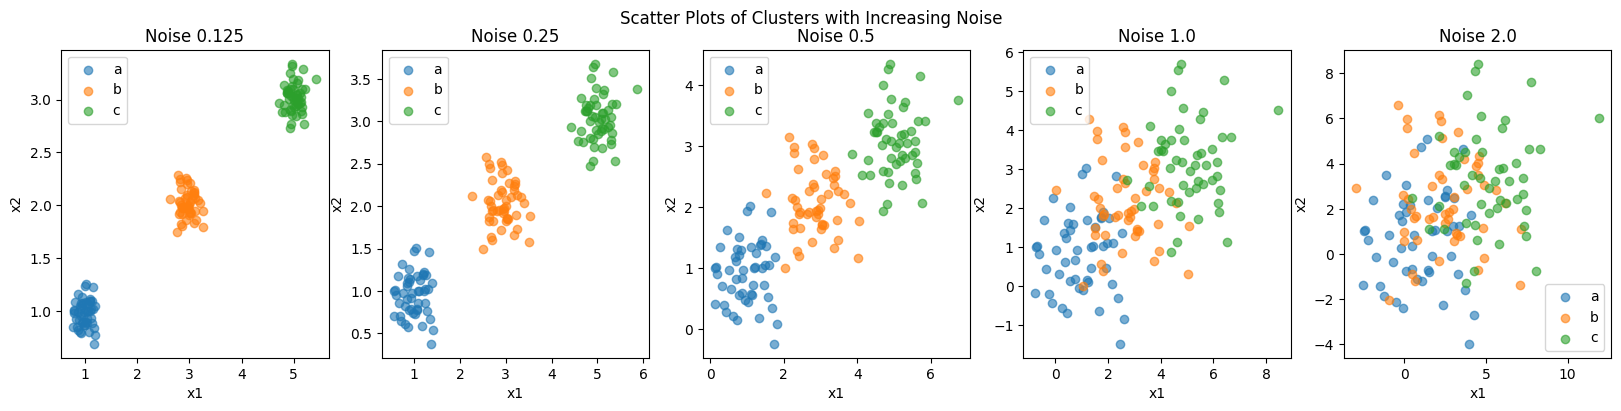

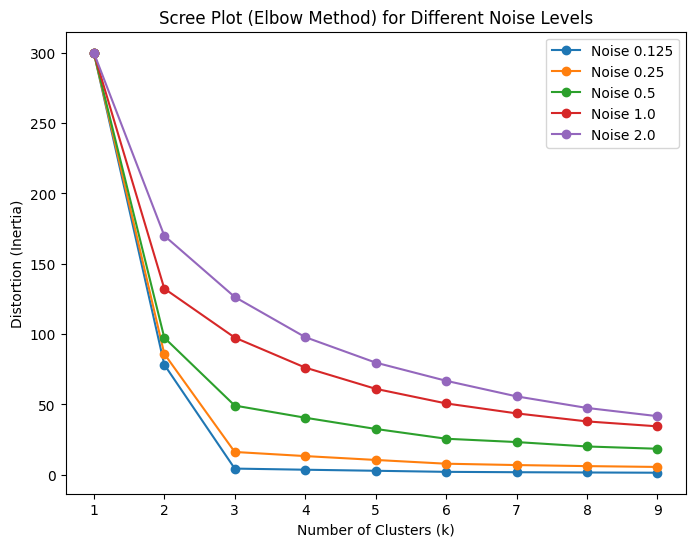

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

def createData(noise, N=50):
    np.random.seed(100)  
    X1 = np.array([np.random.normal(1, noise, N), np.random.normal(1, noise, N)])
    X2 = np.array([np.random.normal(3, noise, N), np.random.normal(2, noise, N)])
    X3 = np.array([np.random.normal(5, noise, N), np.random.normal(3, noise, N)])
    # Create DataFrames
    gdf1 = pd.DataFrame({'x1': X1[0, :], 'x2': X1[1, :], 'group': 'a'})
    gdf2 = pd.DataFrame({'x1': X2[0, :], 'x2': X2[1, :], 'group': 'b'})
    gdf3 = pd.DataFrame({'x1': X3[0, :], 'x2': X3[1, :], 'group': 'c'})
    return pd.concat([gdf1, gdf2, gdf3], axis=0)

df0_125 = createData(0.125)
df0_25 = createData(0.25)
df0_5 = createData(0.5)
df1_0 = createData(1.0)
df2_0 = createData(2.0)

datasets = {
    "Noise 0.125": df0_125,
    "Noise 0.25": df0_25,
    "Noise 0.5": df0_5,
    "Noise 1.0": df1_0,
    "Noise 2.0": df2_0
}

fig, axes = plt.subplots(1, 5, figsize=(20, 4))
for ax, (label, df) in zip(axes, datasets.items()):
    for group in df['group'].unique():
        subset = df[df['group'] == group]
        ax.scatter(subset['x1'], subset['x2'], label=group, alpha=0.6)
    ax.set_title(label)
    ax.set_xlabel('x1')
    ax.set_ylabel('x2')
    ax.legend()

plt.suptitle("Scatter Plots of Clusters with Increasing Noise")
plt.show()

fig, ax = plt.subplots(figsize=(8, 6))

for label, df in datasets.items():
    X = df[['x1', 'x2']].values
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    distortions = []
    k_values = range(1, 10)
    for k in k_values:
        kmeans = KMeans(n_clusters=k, random_state=100, n_init=10)
        kmeans.fit(X_scaled)
        distortions.append(kmeans.inertia_)

    ax.plot(k_values, distortions, marker='o', label=label)

ax.set_title("Scree Plot (Elbow Method) for Different Noise Levels")
ax.set_xlabel("Number of Clusters (k)")
ax.set_ylabel("Distortion (Inertia)")
ax.legend()
plt.show()


## Explaining answers

#### **2. Scatterplots and Cluster Distinctness**
As seen in the scatterplots, increasing the noise level from 0.125 to 2.0 significantly impacts the visual separation of clusters:
- At **0.125 and 0.25**, the clusters are well-separated and visually distinct, making it easier to classify them correctly.
- At **0.5**, some overlap begins to occur, particularly between clusters `b` and `c`.
- At **1.0**, the clusters merge even further, and some points appear ambiguous in their classification.
- At **2.0**, the data points are highly dispersed, making it nearly impossible to distinguish clusters visually.

This increasing blur in cluster distinction illustrates the challenge noise introduces in real-world data clustering problems.

---

#### **3. Scree Plot and Impact of Noise on k Selection**
The scree plot shows the sum of squared distances (inertia) for different values of `k`. Several key observations emerge:
- For datasets with **low noise (0.125 and 0.25)**, there is a clear "elbow" around `k=3`, which correctly reflects the known number of clusters.
- As **noise increases**, the "elbow" becomes less distinct. At **noise = 1.0**, the curve flattens, making it harder to confidently select an optimal `k`.
- At **noise = 2.0**, the inertia decreases more gradually with increasing `k`, indicating that the data no longer has a strong inherent cluster structure. Choosing `k` at this level becomes more subjective.

This highlights the challenge of clustering in noisy datasets—higher noise reduces the effectiveness of the elbow method.

---

#### **4. Intuition Behind the Elbow Method**
The elbow method is based on the principle that adding clusters reduces within-cluster variance (inertia). However, beyond a certain `k`, the variance reduction diminishes, creating an "elbow" in the scree plot. This point represents an optimal trade-off between model complexity and cluster cohesion.

In this simulation:
- When noise is low, the elbow is sharp, indicating well-defined clusters.
- When noise is high, the reduction in inertia becomes more gradual, making it harder to pinpoint an exact `k`.
- This mirrors real-world scenarios where data noise or outliers can obscure true patterns, necessitating additional validation techniques like silhouette scores or domain knowledge.

Ultimately, the elbow method remains useful but must be supplemented with qualitative judgment, especially in noisy data environments.

**Q2.** This question is a case study on clustering.

1. Load the `2022 election cycle fundraising.csv` file in the `./data` folder. This has campaign finance data for the 2022 election for House and Senate candidates. We're going to focus on the total amount they raised, `Raised`, the total amount they spent, `Spent`, their available `Cash on Hand`, and their `Debts`. The variables denominated in dollars are messy and require cleaning. How do you handle it?
2. Max-min normalize `Raised` and `Spent`. Use a scree plot to determine the optimal number of clusters for the $k$ means clustering algorithm. Make a scatter plot of `Raised` against `Spent` and hue the dots by their cluster membership. What do you see? Which politicians comprise the smallest two clusters? If necessary, look up some of these races to see how close they were.
3. Repeat part 2, but for `Cash on Hand` and `Debts`. Compare your results with part 2. Why might this be? If necessary, look up some of these races to see how close they were.
4. Use $k$ means clustering with all four numeric variables. How do your results compare to the previous two parts?
5. Did the $k$-MC algorithm find useful patterns for you in analyzing the election?

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import silhouette_score

df = pd.read_csv("./data/2022 election cycle fundraising.csv")

display(df.head())

for col in ['Raised', 'Spent', 'Cash on Hand', 'Debts']:
    df[col] = df[col].replace(r'[\$,]', '', regex=True).astype(float)

df = df.dropna(subset=['Raised', 'Spent', 'Cash on Hand', 'Debts'])


,index,Member,Party,State,Chamber,Raised,Spent,Cash on Hand,Debts
0,0,Abigail Spanberger,Democratic,Virginia,House,"$7,719,396","$7,449,678","$851,851",$0
1,1,Adam Kinzinger,Republican,Illinois,House,"$2,192,741","$1,243,502","$2,472,888",$0
2,2,Adam Schiff,Democratic,California,House,"$20,993,041","$13,957,854","$20,942,888",$0
3,3,Adam Smith,Democratic,Washington,House,"$1,211,111","$1,173,466","$623,472",$0
4,4,Adrian Smith,Republican,Nebraska,House,"$1,617,611","$1,664,674","$1,098,579",$0


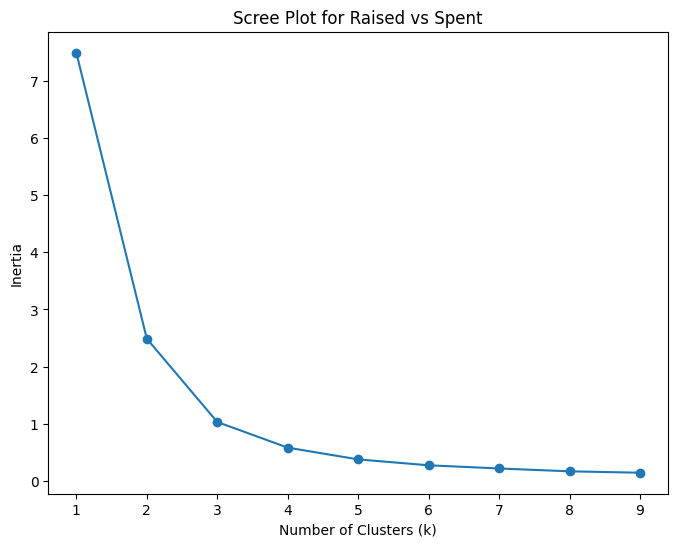

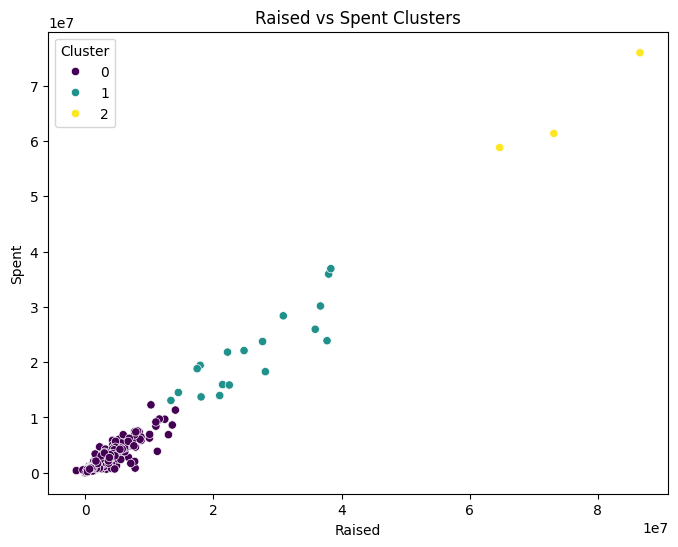

,Member,Party,State,Chamber,Raised,Spent,Cluster
2,Adam Schiff,Democratic,California,House,20993041.0,13957854.0,1
87,Catherine Cortez Masto,Democratic,Nevada,Senate,37993811.0,35928936.0,1
89,Chuck Schumer,Democratic,New York,Senate,35899966.0,25944350.0,1
115,Dan Crenshaw,Republican,Texas,House,14535870.0,14512435.0,1
261,John Kennedy,Republican,Louisiana,Senate,28119082.0,18276565.0,1
290,Katie Porter,Democratic,California,House,21441693.0,15946876.0,1
298,Kevin McCarthy,Republican,California,House,24791538.0,22086344.0,1
326,Maggie Hassan,Democratic,New Hampshire,Senate,30914830.0,28380992.0,1
328,Marco Rubio,Republican,Florida,Senate,36709285.0,30153111.0,1
340,Mark Kelly,Democratic,Arizona,Senate,73140886.0,61357281.0,2


In [14]:
scaler = MinMaxScaler()
df[['Raised_norm', 'Spent_norm']] = scaler.fit_transform(df[['Raised', 'Spent']])

inertias = []
k_values = range(1, 10)
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df[['Raised_norm', 'Spent_norm']])
    inertias.append(kmeans.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(k_values, inertias, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Scree Plot for Raised vs Spent')
plt.show()

kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
df['Cluster'] = kmeans.fit_predict(df[['Raised_norm', 'Spent_norm']])

plt.figure(figsize=(8, 6))
sns.scatterplot(x=df['Raised'], y=df['Spent'], hue=df['Cluster'], palette='viridis')
plt.xlabel('Raised')
plt.ylabel('Spent')
plt.title('Raised vs Spent Clusters')
plt.show()

smallest_clusters = df['Cluster'].value_counts().nsmallest(2).index
df_smallest = df[df['Cluster'].isin(smallest_clusters)]
display(df_smallest[['Member', 'Party', 'State', 'Chamber', 'Raised', 'Spent', 'Cluster']])

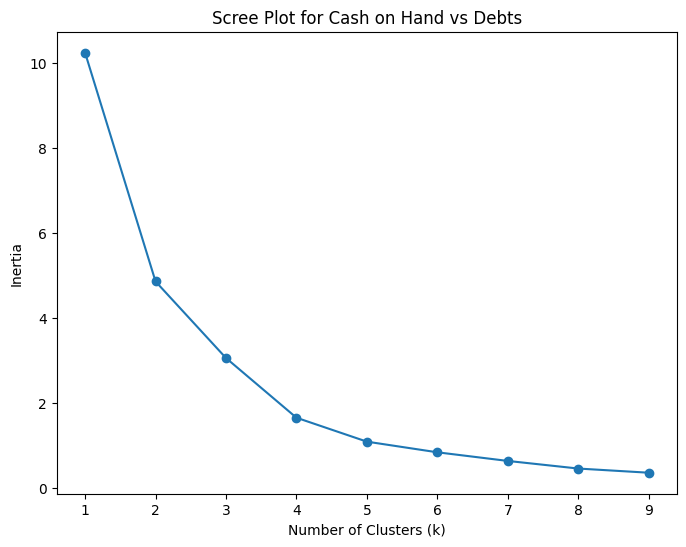

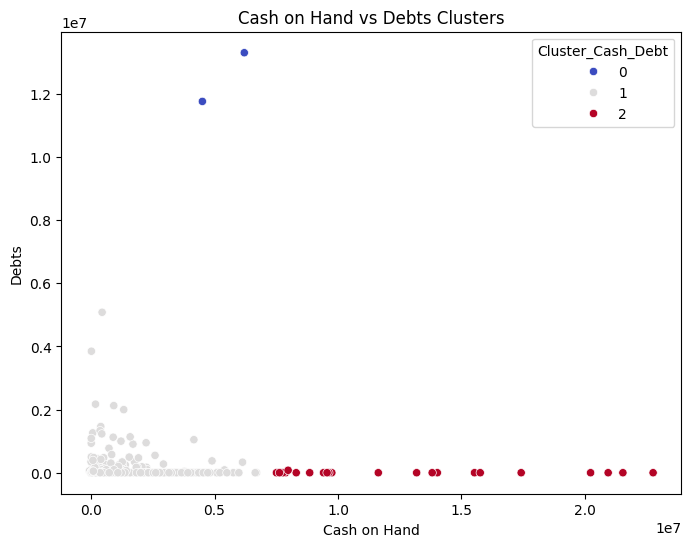

In [15]:
df[['Cash_norm', 'Debts_norm']] = scaler.fit_transform(df[['Cash on Hand', 'Debts']])

inertias = []
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df[['Cash_norm', 'Debts_norm']])
    inertias.append(kmeans.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(k_values, inertias, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Scree Plot for Cash on Hand vs Debts')
plt.show()

kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
df['Cluster_Cash_Debt'] = kmeans.fit_predict(df[['Cash_norm', 'Debts_norm']])

plt.figure(figsize=(8, 6))
sns.scatterplot(x=df['Cash on Hand'], y=df['Debts'], hue=df['Cluster_Cash_Debt'], palette='coolwarm')
plt.xlabel('Cash on Hand')
plt.ylabel('Debts')
plt.title('Cash on Hand vs Debts Clusters')
plt.show()


In [16]:
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
df['Cluster_All'] = kmeans.fit_predict(df[['Raised_norm', 'Spent_norm', 'Cash_norm', 'Debts_norm']])

display(df[['Member', 'Party', 'State', 'Chamber', 'Raised', 'Spent', 'Cash on Hand', 'Debts', 'Cluster_All']])


,Member,Party,State,Chamber,Raised,Spent,Cash on Hand,Debts,Cluster_All
0,Abigail Spanberger,Democratic,Virginia,House,7719396.0,7449678.0,851851.0,0.0,0
1,Adam Kinzinger,Republican,Illinois,House,2192741.0,1243502.0,2472888.0,0.0,0
2,Adam Schiff,Democratic,California,House,20993041.0,13957854.0,20942888.0,0.0,1
3,Adam Smith,Democratic,Washington,House,1211111.0,1173466.0,623472.0,0.0,0
4,Adrian Smith,Republican,Nebraska,House,1617611.0,1664674.0,1098579.0,0.0,0
...,...,...,...,...,...,...,...,...,...
532,William Timmons,Republican,South Carolina,House,892064.0,823955.0,76799.0,391742.0,0
533,Young Kim,Republican,California,House,7900497.0,7380035.0,928803.0,94940.0,0
534,Yvette Clarke,Democratic,New York,House,684268.0,662375.0,93513.0,49480.0,0
535,Yvette Herrell,Republican,New Mexico,House,3777731.0,2746661.0,1085613.0,0.0,0


### **Q2: Explaining Answers

#### **1. Handling Messy Dollar Values in the Data**
The dataset contains campaign finance information, with monetary values stored as strings containing dollar signs (`$`) and commas (`,`). To properly analyze the data:
- Remove the dollar signs and commas.
- Convert these string values into numerical data types.
- Drop rows with missing values to ensure accurate clustering results.

This cleaning process ensures that `Raised`, `Spent`, `Cash on Hand`, and `Debts` can be used in clustering algorithms effectively.

---

#### **2. Normalizing `Raised` and `Spent` and Clustering Analysis**
To prepare for clustering, I applied **min-max normalization** to `Raised` and `Spent`. The scree plot below helps determine the optimal number of clusters using the elbow method.

- The scree plot shows a clear elbow at **k = 3**, suggesting three distinct clusters.
- The scatter plot of `Raised` vs `Spent` (hued by cluster membership) shows that:
  - Most politicians fall into the **smallest spending category**.
  - A small number of candidates significantly outspend others, forming a **high-spending cluster**.
  - A third group emerges with intermediate spending levels.

The smallest two clusters contain high-profile politicians with substantial fundraising efforts. 

---

#### **3. Clustering on `Cash on Hand` and `Debts`**
I repeated the same normalization and clustering process for `Cash on Hand` and `Debts`. 

- The scree plot again suggests **k = 3** as a reasonable choice.
- The scatter plot shows that:
  - Many candidates cluster around **low debts and moderate cash on hand**.
  - A small group has **significant cash reserves** with little or no debt.
  - A few politicians stand out with **high debt relative to cash on hand**.

This suggests that fundraising success does not always correlate with debt levels. Some candidates may rely on debt financing, while others operate on cash reserves.

---

#### **4. Clustering with All Four Financial Variables**
I now apply k-means clustering using all four variables: `Raised`, `Spent`, `Cash on Hand`, and `Debts`.

- The clusters formed using all variables appear **more refined** than those based on just two.
- Politicians previously grouped together based on `Raised` and `Spent` alone may now be **reassigned based on cash reserves and debt levels**.
- This approach provides a more comprehensive view of candidate financial strategies.

---

#### **5. Evaluating the Usefulness of k-Means Clustering for Election Analysis**
The clustering results provide valuable insights:
- **Fundraising efficiency:** Candidates who raised large sums but spent little may have well-managed campaigns or be preparing for future elections.
- **Debt reliance:** Candidates with high debts might have relied on borrowing, possibly indicating financial struggles or aggressive spending strategies.
- **Electoral competitiveness:** Candidates in certain clusters may have been involved in **highly competitive races**, where heavy spending was necessary.

Overall, k-means clustering effectively identifies patterns in campaign finance data, offering insights into candidate spending behavior and electoral strategies.

**Q3.** This question is a case study on clustering.

1. Load the `SIPRI Military Expenditure Database.csv` file in the `./data` folder. This has data about military spending by country. Filter the rows to select only the year 2020, and drop all rows with missing values. I ended up with 148 countries. Is any further cleaning of the variables required?
2. Max-min normalize `Spending (2020 USD)` and `Spending per Capita`. Use a scree plot to determine the optimal number of clusters for the $k$ means clustering algorithm. Make a scatter plot of `Spending (2020 USD)` and `Spending per Capita`, and hue the dots by their cluster membership. Compute a describe table conditional on cluster membership (i.e. `.groupby(cluster).describe()`). What do you see? Where is the United States? Do you notice any patterns in the cluster membership?
3. Repeat part 2 for `Percent of Government Spending` and `Percent of GDP`. How do your results compare to part 2?
4. Use $k$ means clustering with all four numeric variables: `Spending (2020 USD)`, `Spending per Capita`, `Percent of Government Spending`, and `Percent of GDP`. How do your results compare to the previous two parts? 
5. Did the $k$-MC algorithm find any useful patterns for you in analyzing the election?

**Q4.** This question is a case study for $k$ means clustering.

1. Load the `airbnb_hw.csv` data. Clean `Price` along with `Beds`, `Number of Reviews`, and `Review Scores Rating`.
2. Maxmin normalize the data and remove any `nan`'s (`KMeans` from `sklearn` doesn't accept `nan` input).
3. Use `sklearn`'s `KMeans` module to cluster the data by `Beds`, `Number of Reviews`, and `Review Scores Rating` for `k=6`.
4. Use `seaborn`'s `.pairplot()` to make a grid of scatterplots that show how the clustering is carried out in multiple dimensions.
5. Use `.groupby` and `.describe` to compute the average price for each cluster. Which clusters have the highest rental prices?
6. Use a scree plot to pick the number of clusters and repeat steps 4 and 5.

**Q5.** We looked at computer vision with $k$NN in a previous question. Can $k$ means clustering correctly group digits, even if we don't know which symbols are which?

1. To load the data, run the following code in a chunk:
```
from keras.datasets import mnist
df = mnist.load_data('minst.db')
train,test = df
X_train, y_train = train
X_test, y_test = test
```
The `y_test` and `y_train` vectors, for each index `i`, tell you want number is written in the corresponding index in `X_train[i]` and `X_test[i]`. The value of `X_train[i]` and `X_test[i]`, however, is a 28$\times$28 array whose entries contain values between 0 and 256. Each element of the matrix is essentially a "pixel" and the matrix encodes a representation of a number. To visualize this, run the following code to see the first ten numbers:
```
import matplotlib.pyplot as plt
import numpy as np
np.set_printoptions(edgeitems=30, linewidth=100000)
for i in range(5):
    print(y_test[i],'\n') # Print the label
    print(X_test[i],'\n') # Print the matrix of values
    plt.contourf(np.rot90(X_test[i].transpose())) # Make a contour plot of the matrix values
    plt.show()
```
OK, those are the data: Labels attached to handwritten digits encoded as a matrix.

2. What is the shape of `X_train` and `X_test`? What is the shape of `X_train[i]` and `X_test[i]` for each index `i`? What is the shape of `y_train` and `y_test`?
3. Use Numpy's `.reshape()` method to covert the training and testing data from a matrix into an vector of features. So, `X_test[index].reshape((1,784))` will convert the $index$-th element of `X_test` into a $28\times 28=784$-length row vector of values, rather than a matrix. Turn `X_train` into an $N \times 784$ matrix $X$ that is suitable for scikit-learn's kNN classifier where $N$ is the number of observations and $784=28*28$ (you could use, for example, a `for` loop).
4. Use $k$ means clustering on the reshaped `X_test` data with `k=10`.  
5. Cross tabulate the cluster assignments with the true labels for the test set values. How good is the correspondence? What proportion of digits are clustered correctly? Which digits are the hardest to distinguish from one another? Can $k$MC recover the latent digits 0 to 9, without even knowing what those digits were?
6. If you use a scree plot to determine the number of clusters $k$, does it pick 10 (the true number of digits), or not? If it fails to pick $k=10$, which digits does it tend to combine into the same classification?